In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets, tree

In [2]:
# Tải Wine dataset
dataset = datasets.load_wine()
X = dataset.data  # 13 features
y = dataset.target  # 3 classes

# Chia train/test (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# DataFrame để xem
data_df = pd.DataFrame(X, columns=dataset.feature_names)
data_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
# Khởi tạo Decision Tree với max_depth=4
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [4]:
# Predict
y_pred = model.predict(X_test)

# Báo cáo chi tiết
print("Classification report for DecisionTree:\n")
print(classification_report(y_test, y_pred, target_names=dataset.target_names))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification report for DecisionTree:

              precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        15
     class_1       0.95      1.00      0.97        18
     class_2       1.00      0.92      0.96        12

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Accuracy: 0.96


<Figure size 500x500 with 0 Axes>

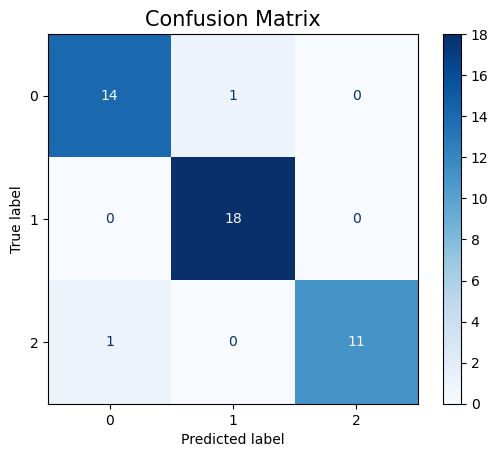

In [6]:
# Vẽ Confusion Matrix 
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(5, 5))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix", fontsize=15)
plt.show()

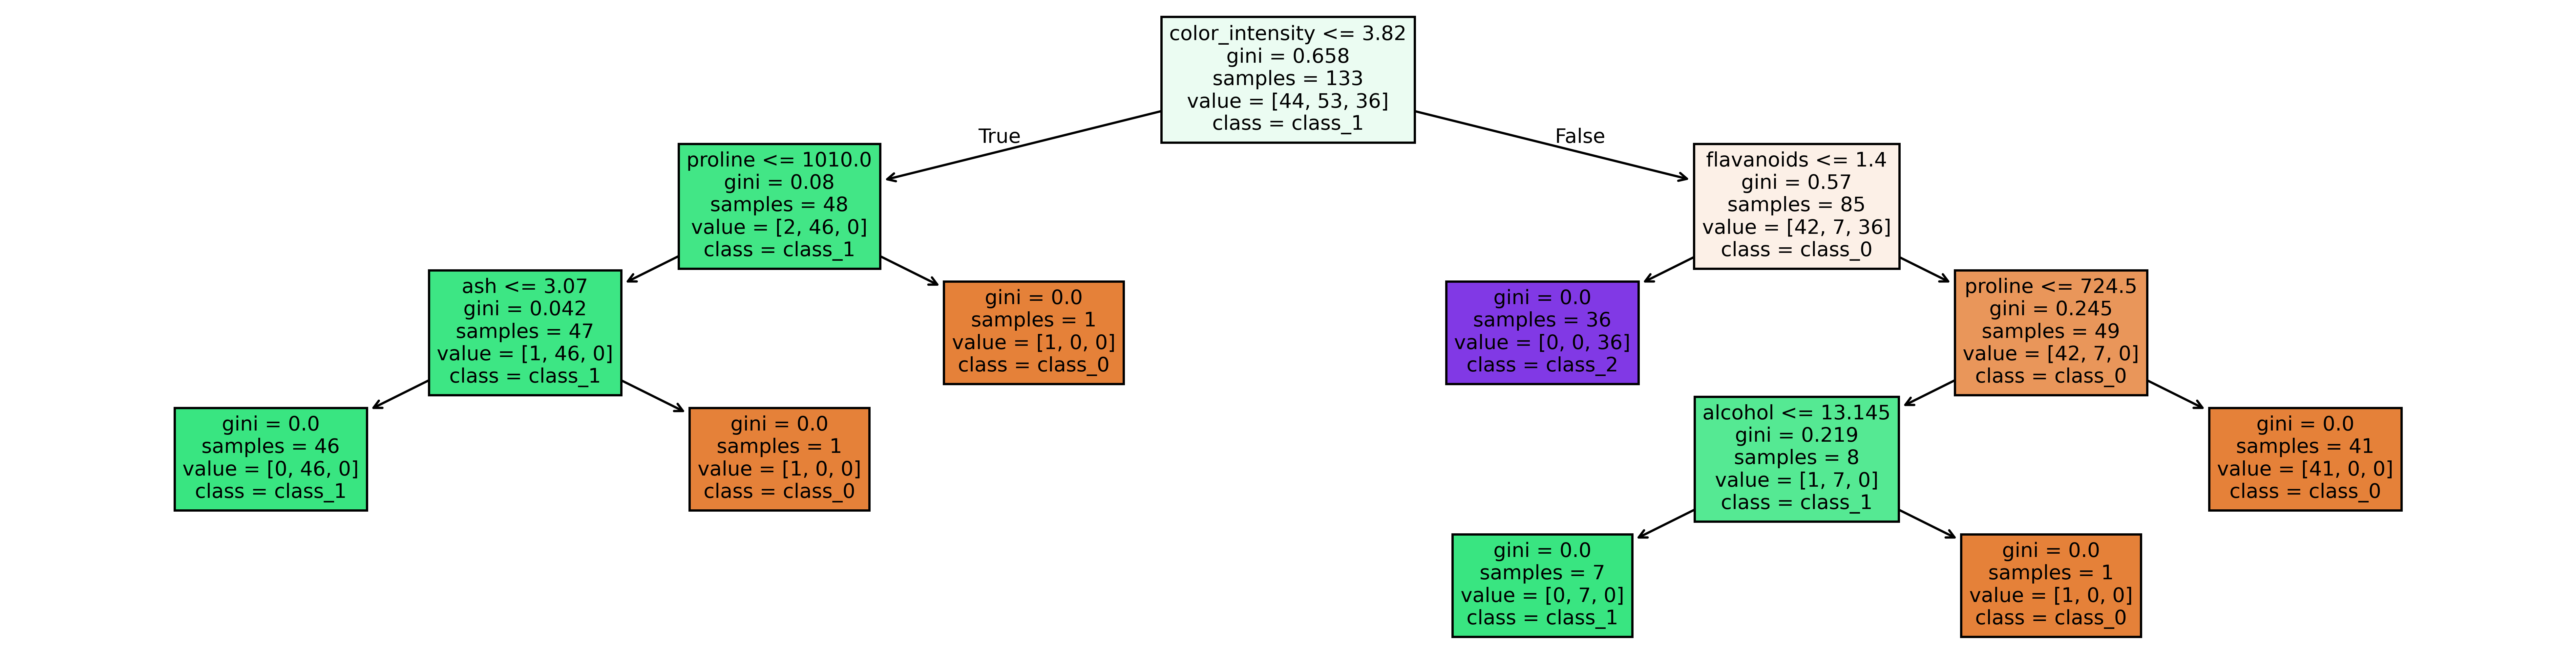

In [7]:
# Vẽ cây quyết định
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5), dpi=500)
tree.plot_tree(model,
               feature_names=dataset.feature_names, 
               class_names=dataset.target_names,
               filled=True)
plt.show()

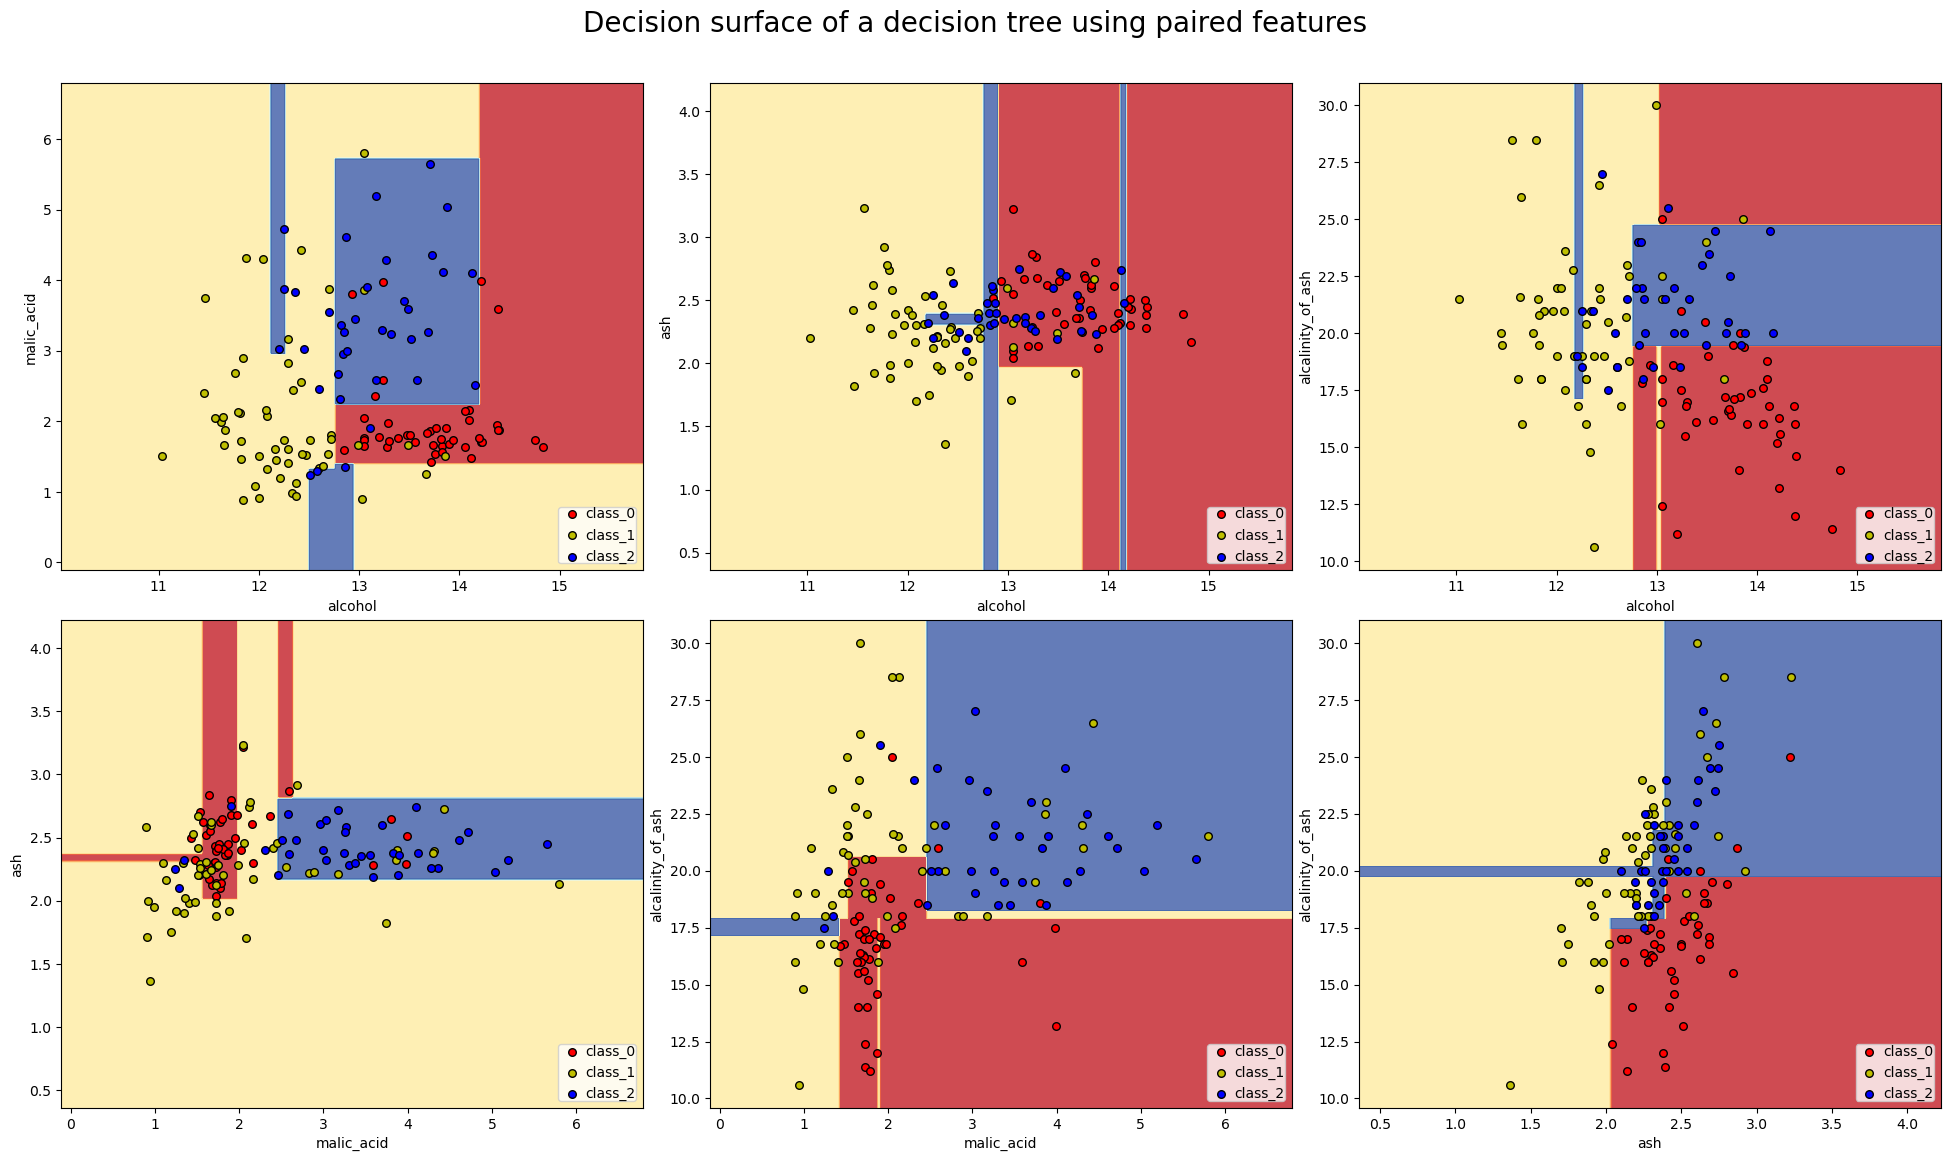

In [8]:
# Vẽ decision boundary cho 6 cặp features
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

plt.figure(figsize=(20, 12))
plt.suptitle("Decision surface of a decision tree using paired features", fontsize=20)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    plt.subplot(2, 3, pairidx + 1)
    X_pair = X_train[:, pair]
    clf = DecisionTreeClassifier(max_depth=4).fit(X_pair, y_train)
    
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    
    plt.xlabel(dataset.feature_names[pair[0]])
    plt.ylabel(dataset.feature_names[pair[1]])
    
    # Scatter points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == i)
        plt.scatter(X_pair[idx, 0], X_pair[idx, 1], c=color, label=dataset.target_names[i],
                    edgecolor='black', s=30)
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
plt.show()

## Kết luận
Decision Tree phân loại 3 loại rượu dựa trên 13 hóa chất đạt 96% accuracy. Cây dễ interpret (e.g., ngưỡng proline). Boundary cho thấy tách biệt tốt giữa classes.